In [ ]:
from src.utils import yaml_config_hook
from src.loaders import *
from src.models import ResNet1D
from src.trainers import *

In [79]:
import numpy as np, os
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

def plot_results(files1, files2, metric='Aggregated F1-macro'):
    # Load the data from the input files
    data1, stds1 = [], []
    for file in files1:
        if not os.path.exists("results/" + file + ".txt"):
            raise FileNotFoundError("File not found: " + file + ".txt")
        with open("results/" + file + ".txt", "r") as f:
            for line in f:
                if line.startswith(metric):
                    data1.append(line.split()[2])
                    stds1.append(line.split()[3][1:-1])
                    break

    data2, stds2 = [], []
    for file in files2:
        if not os.path.exists("results/" + file + ".txt"):
            raise FileNotFoundError("File not found: " + file + ".txt")
        with open("results/" + file + ".txt", "r") as f:
            for line in f:
                if line.startswith(metric):
                    data2.append(line.split()[2])
                    stds2.append(line.split()[3][1:-1])
                    break
    
    # Convert to numpy arrays
    data1 = np.array(data1, dtype=float)
    stds1 = np.array(stds1, dtype=float)
    data2 = np.array(data2, dtype=float)
    stds2 = np.array(stds2, dtype=float)
    
    # Create the plot
    dataset = file_list_1[0].split("_")[0]
    names = [int(file[-3:]) for file in files1[:-1]] + [100]

    fig, ax = plt.subplots()

    ax.fill_between(range(len(files1)), data1 - stds1, data1 + stds1, alpha=0.2)
    ax.plot(range(len(files1)), data1, marker="o", label="TILES-frozen")

    ax.fill_between(range(len(files2)), data2 - stds2, data2 + stds2, alpha=0.2)
    ax.plot(range(len(files2)), data2, marker="o", label="from-scratch")
    
    ax.set_xticks(range(5))
    ax.set_xticklabels(names)
    ax.set_xlabel('Percentage of training data (%)')
    ax.set_ylabel(metric)
    ax.legend(loc='lower right')
    ax.set_title(f"{dataset} subject-agnostic")
    plt.show()

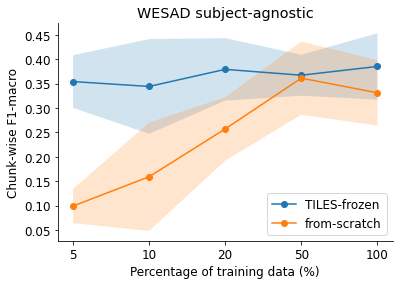

In [89]:
dataset = "WESAD"
file_list_1 = [f"{dataset}_frozen_005", f"{dataset}_frozen_010", f"{dataset}_frozen_020", f"{dataset}_frozen_050", f"{dataset}_frozen"]
file_list_2 = [f"{dataset}_scratch_005", f"{dataset}_scratch_010", f"{dataset}_scratch_020", f"{dataset}_scratch_050", f"{dataset}_scratch"]

plot_results(file_list_1, file_list_2, metric='Chunk-wise F1-macro')